# Input & Label

In [1]:
from rtmag.paper.load import load_input_label, MyModel

In [2]:
input_files, label_files = load_input_label("/mnt/f/isee_dataset/11158")
len(input_files), len(label_files)

(66, 66)

In [3]:
idx = 13
input_files[idx]

PosixPath('/mnt/f/isee_dataset/11158/input/input_11158_20110214_000000.npz')

# Model prediction & Label (NLFFF, Potential)

In [13]:
from time import time

In [14]:
# mm = MyModel("/home/mgjeon/space/workspace/base/pino_CC_Hnorm_Unit_2/best_model.pt")
mm = MyModel("/home/mgjeon/space/workspace/base_important/uno_pi_cc_hnorm_unit_aug/model_75.pt")
# mm2 = MyModel("/home/mgjeon/space/workspace/base/uno_pi_cc_hnorm_unit_aug/model_60.pt")

Model loaded from epoch 75


In [16]:
start_time = time()
b = mm.get_pred(input_files[idx])
print(f"{time() - start_time} seconds")

0.4460875988006592 seconds


In [17]:
start_time = time()
B = mm.get_label(label_files[idx])
print(f"{time() - start_time} seconds")

3.876392126083374 seconds


In [18]:
start_time = time()
Bp = mm.get_pot(label_files[idx])
print(f"{time() - start_time} seconds")

1.7411584854125977 seconds


In [19]:
start_time = time()
dx, dy, dz, dV = mm.get_dV(input_files[idx])
print(f"{time() - start_time} seconds")

0.004128217697143555 seconds


# Qualitative Evaluation

In [20]:
import matplotlib.pyplot as plt

In [157]:
from rtmag.paper.metric import vector_norm, current_density, curl
import numpy as np

In [24]:
start_time = time()
j = current_density(b, dx, dy, dz)  # [mA/m^2]
j_map = vector_norm(j).sum(2) 
j_map *= 1e-7 # A/cm^2
j_map *= dz # A/cm
print(f"{time() - start_time} seconds")

0.9930973052978516 seconds


In [25]:
start_time = time()
J = current_density(B, dx, dy, dz)
J_map = vector_norm(J).sum(2) # A/m^2
J_map *= 1e-7 # A/cm^2
J_map *= dz # A/cm
print(f"{time() - start_time} seconds")

0.5091063976287842 seconds


In [159]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

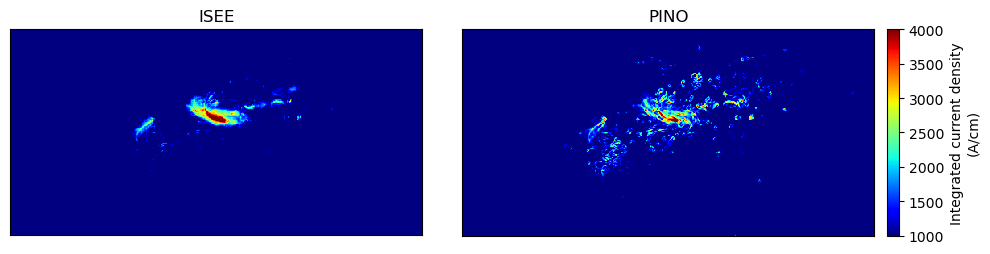

In [164]:
vmin = 1000
vmax = 4000

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im = axs[0].pcolormesh(vector_norm(curl(B)).sum(2).T, cmap="jet", vmin=vmin, vmax=vmax)
axs[0].set_title("ISEE")
axs[0].set_aspect("equal")
axs[0].set_xticks([])
axs[0].set_yticks([])
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")


# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
# fig.colorbar(im, cax=cax, label='$J$\n(A/m$^2$)', ticks=[0, 0.5, 1, 10, 2], orientation="horizontal", location="bottom")

axs[1].pcolormesh(vector_norm(curl(b)).sum(2).T, cmap="jet", vmin=vmin, vmax=vmax)
axs[1].set_title("PINO")
axs[1].set_aspect("equal")
axs[1].set_xticks([])
axs[1].set_yticks([])

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="3%", pad="3%")
fig.add_axes(cax)
# fig.colorbar(im, cax = cax, label='Integrated current density\n(A/cm)', ticks=[vmin, 2*vmin, 3*vmin, 4*vmin, vmax])
fig.colorbar(im, cax = cax, label='Integrated current density\n(A/cm)')

plt.tight_layout()
plt.show()

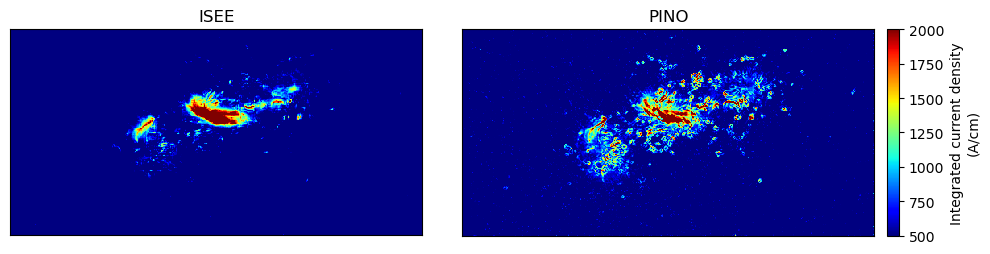

In [163]:
vmin = 500
vmax = 2000

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im = axs[0].pcolormesh(J_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[0].set_title("ISEE")
axs[0].set_aspect("equal")
axs[0].set_xticks([])
axs[0].set_yticks([])
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")


# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
# fig.colorbar(im, cax=cax, label='$J$\n(A/m$^2$)', ticks=[0, 0.5, 1, 10, 2], orientation="horizontal", location="bottom")

axs[1].pcolormesh(j_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[1].set_title("PINO")
axs[1].set_aspect("equal")
axs[1].set_xticks([])
axs[1].set_yticks([])

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="3%", pad="3%")
fig.add_axes(cax)
# fig.colorbar(im, cax = cax, label='Integrated current density\n(A/cm)', ticks=[vmin, 2*vmin, 3*vmin, 4*vmin, vmax])
fig.colorbar(im, cax = cax, label='Integrated current density\n(A/cm)')

plt.tight_layout()
plt.show()

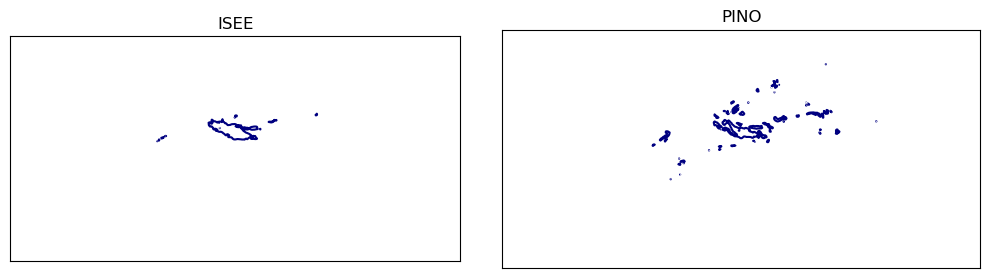

In [137]:
levels = [2000]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].contour(J_map.T, cmap="jet", levels=levels)
axs[0].set_title("ISEE")
axs[0].set_aspect("equal")
axs[0].set_xticks([])
axs[0].set_yticks([])
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")


# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
# fig.colorbar(im, cax=cax, label='$J$\n(A/m$^2$)', ticks=[0, 0.5, 1, 10, 2], orientation="horizontal", location="bottom")

axs[1].contour(j_map.T, cmap="jet", levels=levels)
axs[1].set_title("PINO")
axs[1].set_aspect("equal")
axs[1].set_xticks([])
axs[1].set_yticks([])

# divider = make_axes_locatable(axs[1])
# cax = divider.append_axes("right", size="3%", pad="3%")
# fig.add_axes(cax)
# fig.colorbar(im, cax = cax, label='Integrated current density\n(A/cm)', ticks=[vmin, 2*vmin, 3*vmin, 4*vmin, vmax])
# fig.colorbar(im, cax = cax, label='Integrated current density\n(A/cm)')

plt.tight_layout()
plt.show()

/tmp/ipykernel_185000/1086651317.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


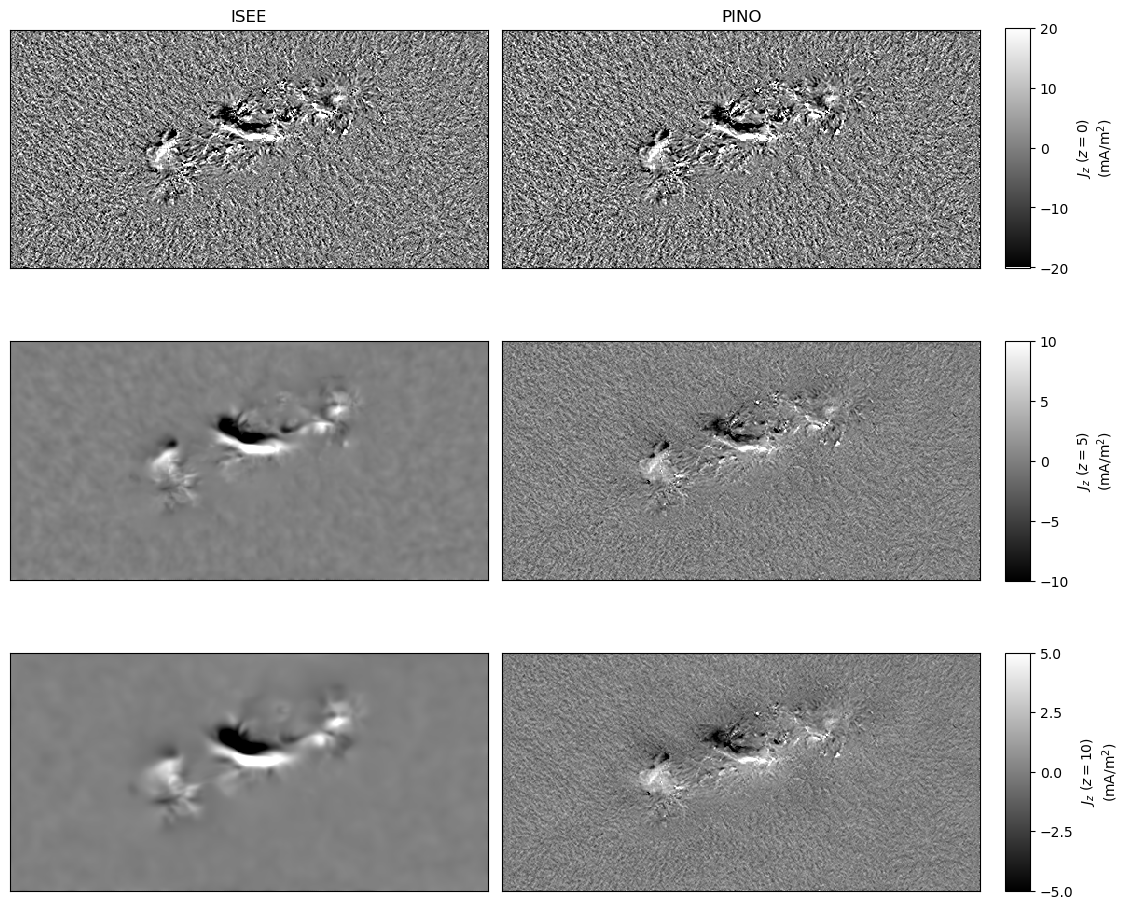

In [156]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

z = 0
vmm = 20
axs[0, 0].pcolormesh(J[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 0].set_title("ISEE")
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])
axs[0, 0].set_aspect("equal")

im = axs[0, 1].pcolormesh(j[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 1].set_title("PINO")
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])
axs[0, 1].set_aspect("equal")
cax = fig.add_axes([1.01, 0.693, 0.025, 0.24])
fig.colorbar(im, cax=cax, label=f'$J_z$ $(z={z})$\n(mA/m$^2$)', ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])

z = 5
vmm = 10
axs[1, 0].pcolormesh(J[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 0].set_title("ISEE $B_z$ $(z=5)$")
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])
axs[1, 0].set_aspect("equal")

im = axs[1, 1].pcolormesh(j[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 1].set_title("PINO $B_z$ $(z=5)$")
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])
axs[1, 1].set_aspect("equal")
cax = fig.add_axes([1.01, 0.38, 0.025, 0.24])
fig.colorbar(im, cax=cax, label=f'$J_z$ $(z={z})$\n(mA/m$^2$)', ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
# fig.colorbar(im)

z = 10
vmm = 5
axs[2, 0].pcolormesh(J[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[2, 0].set_title("ISEE $B_z$ $(z=10)$")
axs[2, 0].set_xticks([])
axs[2, 0].set_yticks([])
axs[2, 0].set_aspect("equal")

im = axs[2, 1].pcolormesh(j[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[2, 1].set_title("PINO $B_z$ $(z=10)$")
axs[2, 1].set_xticks([])
axs[2, 1].set_yticks([])
axs[2, 1].set_aspect("equal")
cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
fig.colorbar(im, cax=cax, label=f'$J_z$ $(z={z})$\n(mA/m$^2$)', ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
# fig.colorbar(im)


plt.tight_layout()
plt.show()

In [27]:
e_den = (vector_norm(b)**2)/(8*np.pi)   # erg/cm^3
E_den = (vector_norm(B)**2)/(8*np.pi)

e_map = e_den.sum(2) * dz   # erg/cm^2
E_map = E_den.sum(2) * dz

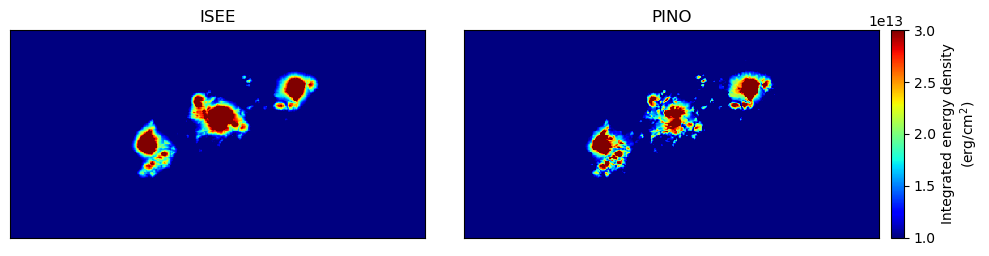

In [41]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

vmin = 1e13
vmax = 3e13

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im = axs[0].pcolormesh(E_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[0].set_title("ISEE")
axs[0].set_aspect("equal")
axs[0].set_xticks([])
axs[0].set_yticks([])
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")


# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
# fig.colorbar(im, cax=cax, label='$J$\n(A/m$^2$)', ticks=[0, 0.5, 1, 10, 2], orientation="horizontal", location="bottom")

axs[1].pcolormesh(e_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[1].set_title("PINO")
axs[1].set_aspect("equal")
axs[1].set_xticks([])
axs[1].set_yticks([])

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="3%", pad="3%")
fig.add_axes(cax)
fig.colorbar(im, cax = cax, label='Integrated energy density\n(erg/cm$^2$)')

plt.tight_layout()
plt.show()

In [42]:
Ep_den = (vector_norm(Bp)**2)/(8*np.pi)
Ep_map = Ep_den.sum(2) * dz

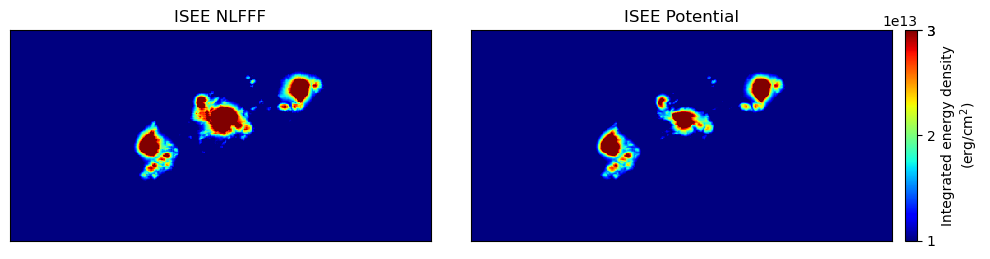

In [43]:
vmin = 1e13
vmax = 3e13

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im = axs[0].pcolormesh(E_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[0].set_title("ISEE NLFFF")
axs[0].set_aspect("equal")
axs[0].set_xticks([])
axs[0].set_yticks([])
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")


# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
# fig.colorbar(im, cax=cax, label='$J$\n(A/m$^2$)', ticks=[0, 0.5, 1, 10, 2], orientation="horizontal", location="bottom")

axs[1].pcolormesh(Ep_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[1].set_title("ISEE Potential")
axs[1].set_aspect("equal")
axs[1].set_xticks([])
axs[1].set_yticks([])

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="3%", pad="3%")
fig.add_axes(cax)

fig.colorbar(im, cax = cax, label='Integrated energy density\n(erg/cm$^2$)', ticks=[vmin, 2*vmin, 3*vmin, 4*vmin, vmax])

plt.tight_layout()
plt.show()

In [45]:
E_free_map = E_map - Ep_map
e_free_map = e_map - Ep_map

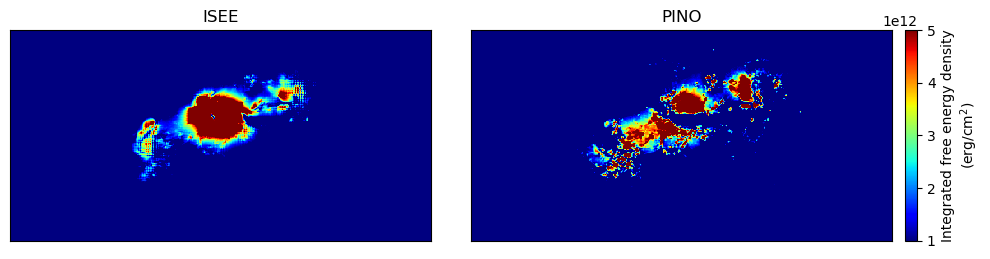

In [54]:
vmin = 1e12
vmax = 5e12

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im = axs[0].pcolormesh(E_free_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[0].set_title("ISEE")
axs[0].set_aspect("equal")
axs[0].set_xticks([])
axs[0].set_yticks([])
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")


# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
# fig.colorbar(im, cax=cax, label='$J$\n(A/m$^2$)', ticks=[0, 0.5, 1, 10, 2], orientation="horizontal", location="bottom")

axs[1].pcolormesh(e_free_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[1].set_title("PINO")
axs[1].set_aspect("equal")
axs[1].set_xticks([])
axs[1].set_yticks([])

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="3%", pad="3%")
fig.add_axes(cax)
fig.colorbar(im, cax = cax, label='Integrated free energy density\n(erg/cm$^2$)')

plt.tight_layout()
plt.show()